In [3]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import glob
import os
import tables as tb

from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d as m3d
import math
from matplotlib import image
import matplotlib.pyplot as plt

import seaborn as sns
import sys
import pickle
import time
import re

In [4]:
datfiles='/Users/rogerslc/MuonData/reconstructedAngularDistrMuonFlux-mss-LAB2400-finalNumbers.csv'

In [5]:
MuonMeas = pd.read_csv(datfiles, delimiter=',',header=None).values
muon_data=pd.DataFrame(data=MuonMeas, columns=["phi", "theta","flux"])
muon_data=muon_data[muon_data.theta<80]

In [6]:

cols = [ 'theta', 'phi','flux']
muon_data = muon_data[cols]


for PHI in muon_data.phi.unique():
    avg=muon_data[(muon_data.theta<=4) & (muon_data.theta>=1) & (muon_data.phi==PHI)].flux.mean()
    muon_data['flux'].loc[(muon_data.phi==PHI) & (muon_data.theta<=4)]=avg
    
muon_data['phi']=muon_data['phi'].map(lambda phi: np.radians(phi))

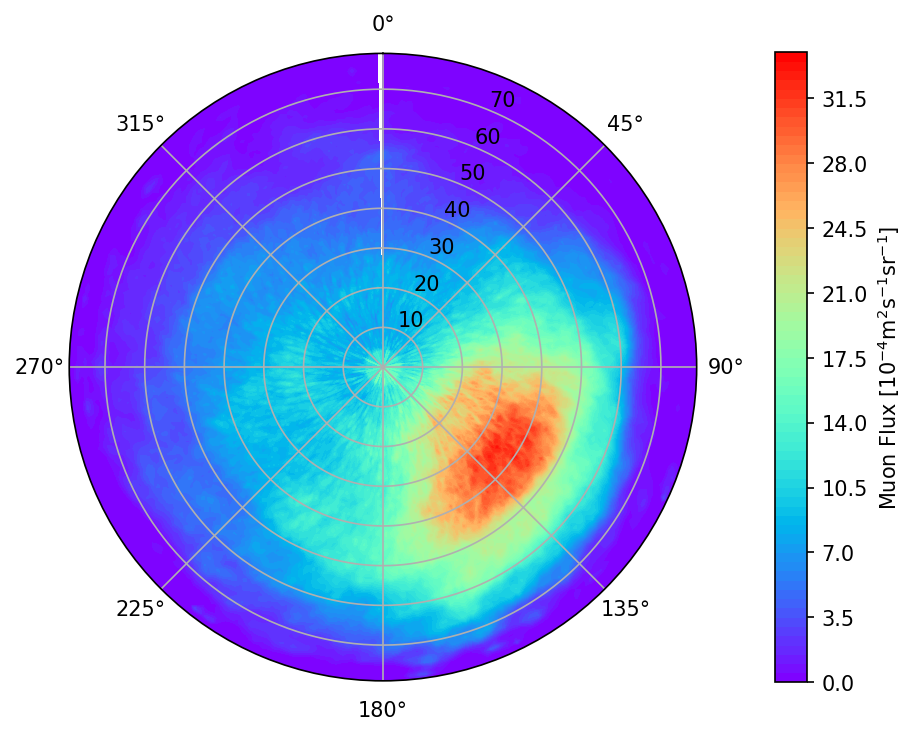

In [7]:
rmu, thetamu = np.meshgrid(muon_data.theta.unique(), muon_data.phi.unique())

valuesmu=np.array(muon_data.flux*10**4)
valuesmu = valuesmu.reshape(len(muon_data.phi.unique()), len(muon_data.theta.unique()))
 
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'),constrained_layout=True,figsize=(6,6),dpi=150,facecolor='white')

#to put north on top
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

#cax=ax.contourf(thetamu, rmu, valuesmu,60, cmap=plt.cm.nipy_spectral)
cax=ax.contourf(thetamu, rmu, valuesmu,80, cmap=plt.cm.rainbow)
cb = fig.colorbar(cax, shrink=0.7)


cb.set_label("Muon Flux [10$^{-4}$m$^{2}$s$^{-1}$sr$^{-1}$]")
plt.show()

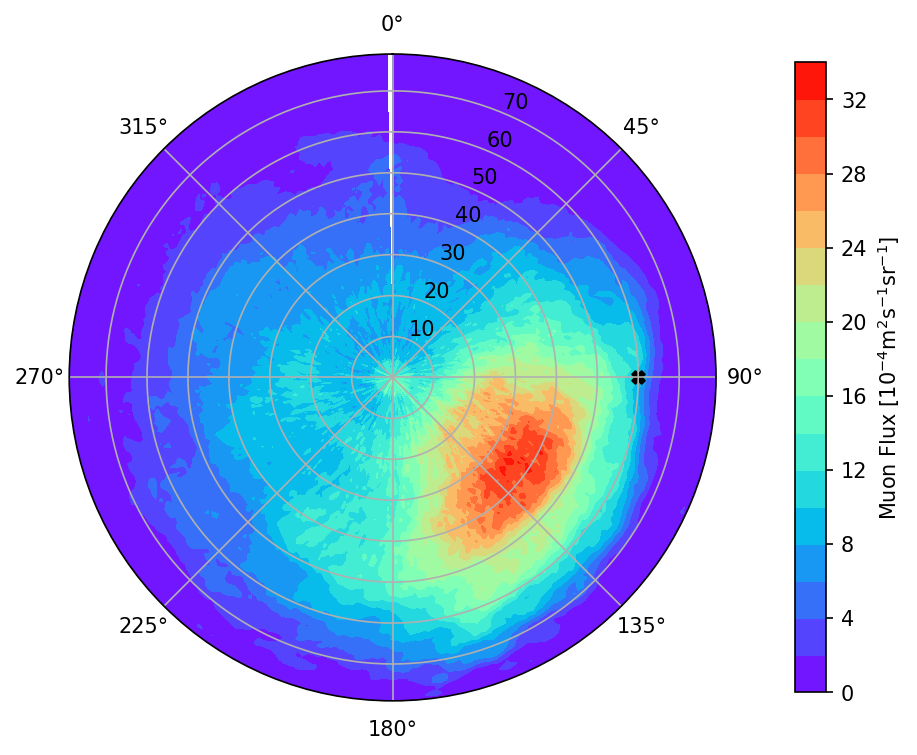

In [21]:
rmu, thetamu = np.meshgrid(muon_data.theta.unique(), muon_data.phi.unique())

valuesmu=np.array(muon_data.flux*10**4)
valuesmu = valuesmu.reshape(len(muon_data.phi.unique()), len(muon_data.theta.unique()))
 
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'),constrained_layout=True,figsize=(6,6),dpi=150,facecolor='white')


#to put north on top
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)

#cax=ax.contourf(thetamu, rmu, valuesmu,60, cmap=plt.cm.nipy_spectral)
cax=ax.contourf(thetamu, rmu, valuesmu,20, cmap=plt.cm.rainbow)
cb = fig.colorbar(cax, shrink=0.7)

ax.scatter(np.deg2rad(115),60,marker='X',color='k')
cb.set_label("Muon Flux [10$^{-4}$m$^{2}$s$^{-1}$sr$^{-1}$]")
plt.show()

In [8]:
muon_data.theta.unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79.])